In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read excel
data = pd.read_csv('Data.csv')

In [3]:
data['SALE DATE']

0         5/22/18
1          9/7/18
2          9/5/18
3          5/9/18
4         5/18/18
5          6/4/18
6          3/5/18
7          3/5/18
8         5/18/18
9        11/13/17
10        5/18/18
11        3/29/18
12         6/4/18
13        9/21/18
14        8/28/18
15         1/3/18
16        2/28/18
17        11/6/17
18        5/31/18
19        11/2/17
20        7/16/18
21        2/27/18
22         9/7/18
23        1/18/18
24        8/27/18
25        4/10/18
26        1/11/18
27       11/22/17
28         2/8/18
29        9/17/18
           ...   
12726      9/7/18
12727     9/21/18
12728     8/28/18
12729     12/1/17
12730     4/26/18
12731     9/12/18
12732     8/28/18
12733     4/30/18
12734      4/3/18
12735     6/27/18
12736    12/11/17
12737     7/12/18
12738    11/16/17
12739     10/3/17
12740     5/10/18
12741     9/13/18
12742     5/10/18
12743    12/18/17
12744    12/27/17
12745     5/23/18
12746     7/23/18
12747     10/4/17
12748    12/29/17
12749     2/22/18
12750     

In [4]:
mon = lambda x: x.split('/')[0]
data['Sale_month'] = data['SALE DATE'].map(mon)
for month in range(1,13):
    data['month_' + str(month)] = np.where(data['Sale_month'] == month, 1, 0)

In [5]:
# Tax class
tax_class = data['TAX CLASS AT TIME OF SALE'].unique().tolist()
for tax in tax_class:
    data['TAX CLASS = ' + str(tax)] = np.where(data['TAX CLASS AT TIME OF SALE'] == tax, 1, 0)

In [6]:
# Building class
RESIDENTIAL = ['A', 'B', 'C', 'D', 'R']
MIXED_USE = ['S']
COMMERCIAL_BUILDINGS = ['H','K','L','O']
INDUSTRIAL_BUILDINGS = ['E', 'F', 'G','T','U']
VACANT_LOTS = ['V']
CIVIC_USE = ['I','J','M','N','P','Q','W']
GOVERNMENTa_BLDG = ['Y']
OTHERS = ['Z']
class_dict = {'RESIDENTIAL': RESIDENTIAL, 'MIXED_USE': MIXED_USE, 'COMMERCIAL_BUILDINGS':COMMERCIAL_BUILDINGS, 
             'INDUSTRIAL_BUILDINGS':INDUSTRIAL_BUILDINGS, 'VACANT_LOTS':VACANT_LOTS, 'CIVIC_USE': CIVIC_USE, 
              'GOVERNMENT_BLDG':GOVERNMENTa_BLDG, 'OTHERS':OTHERS}
RESIDENTIAL_CLASS = {'One Family Dwellings': 'A','Two Family Dwellings': 'B','Walk Up Apartments':'C',
                     'Elevator Apartments':'D','Condominiums':'R'}
for key, value in class_dict.items():
    data[key] = np.where(data['BUILDING CLASS'].isin(value), 1, 0)
    if key == 'RESIDENTIAL':
        for key0, value0 in RESIDENTIAL_CLASS.items():
            data[key0] = np.where(data['BUILDING CLASS'] == value0, 1, 0)

In [7]:
# Help function
def MatFromList(match_list):
    for i in match_list:
        if i:
            return i
    return False

In [8]:
# Apartment Floor
import re
# Deal with unit style number+alphabet
pat_0A = r'^([0-9]{1,2})[A-Za-z]$'
# Deal with unit style: (alphabet)+3/4 numbers
pat_0000 = r'^[A-Z]?([0-9]{1,2})([0-9]{2})$'
# Deal with unit style numer and N/W/E/S/
pat_N0A = r'^[NSEW]([0-9]{1,2})[A-Za-z]$'
pat_A0N = r'^[A-Za-z]([0-9]{1,2})([NSEW])$'
pat_0AN = r'^([0-9]{1,2})[A-Za-z]([NSEW])$'
data['Apt Floor']=0

for idx,x in zip(data.index, data['APARTMENT NUMBER']):
    xs = x.replace('-','').replace('#', '').replace(' ', '').split('/')
    for x in xs:
        m1 = re.match(pat_0A, x)
        m2 = re.match(pat_0000, x)
        m3 = re.match(pat_N0A, x)
        m4 = re.match(pat_A0N, x)
        m5 = re.match(pat_0AN, x)
        match = MatFromList([m1, m2, m3, m4, m5])
        if match:
            data.loc[idx, 'Apt Floor'] = int(match.group(1))
data['Apt Floor_mv'] = (data['Apt Floor']==0).astype(int)
blmin=np.min(data['Apt Floor'])
blmax=np.max(data['Apt Floor'])
data["Apt Floor STAN"]=list(map(lambda x: (x-blmin)/(blmax-blmin),data['Apt Floor']))
data=data.drop(["Apt Floor"],axis=1)

In [9]:
# LAND SQUARE FEET: feed missing with mean and create a missing dummy
data['LAND SQUARE FEET_mv'] = (data['LAND SQUARE FEET']==0).astype(int)
mean_area = data['LAND SQUARE FEET'][data['LAND SQUARE FEET_mv']==0].mean()
data['LAND SQUARE FEET'][data['LAND SQUARE FEET_mv']==1]=mean_area
blmin=np.min(data["LAND SQUARE FEET"])
blmax=np.max(data["LAND SQUARE FEET"])
data["LAND SQUARE FEET STAN"]=list(map(lambda x: (x-blmin)/(blmax-blmin),data["LAND SQUARE FEET"]))
data=data.drop(["LAND SQUARE FEET"],axis=1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [10]:
# Years
year_list = [1800, 1900, 2000, 2019]
for i in range(len(year_list)-1):
    data['BUILD_YEAR('+str(year_list[i])+'-'+str(year_list[i+1])+')'] = np.where(data['YEAR BUILT'].isin(range(year_list[i], year_list[i+1])), 1, 0)

In [11]:
data.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE',
       'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE',
       'BUILDING CLASS', 'BUILDING CLASS NO', 'location', 'latitude',
       'longitude', 'zip', 'co_wrong', 'co_mv', 'Sale_month', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'TAX CLASS = 1', 'TAX CLASS = 2', 'TAX CLASS = 4', 'RESIDENTIAL',
       'One Family Dwellings', 'Two Family Dwellings', 'Walk Up Apartments',
       'Elevator Apartments', 'Condominiums', 'MIXED_USE',
       'COMMERCIAL_BUILDINGS', 'INDUSTRIAL_BUILDINGS', 'VACANT_LOTS',
       'CIVIC_USE', 'GOV

In [12]:
data = data.drop(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY','TAX CLASS AT PRESENT', 'BLOCK', 
                  'LOT', 'EASE-MENT','BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
                  'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS','GROSS SQUARE FEET', 'YEAR BUILT',
                  'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE', 'SALE DATE', 'Sale_month', 
                  'BUILDING CLASS', 'BUILDING CLASS NO','month_12','TAX CLASS = 4','OTHERS', 'zip', 'co_wrong', 'co_mv','location'], axis=1)

In [13]:
data.to_csv("finaldata.csv")

In [ ]:
#np.random.seed(2905)
shuffled_data = data.loc[np.random.permutation(data.index), :]
shuffled_data

In [13]:
shuffled_data.head()

,Unnamed: 0,SALE PRICE,latitude,longitude,month_1,month_2,month_3,month_4,month_5,month_6,...,VACANT_LOTS,CIVIC_USE,GOVERNMENT_BLDG,Apt Floor_mv,Apt Floor STAN,LAND SQUARE FEET_mv,LAND SQUARE FEET STAN,BUILD_YEAR(1800-1900),BUILD_YEAR(1900-2000),BUILD_YEAR(2000-2019)
7488,7488,3125000,40.715823,-74.012136,0,0,0,0,0,0,...,0,0,0,0,0.238636,1,0.015092,0,0,1
488,488,2360000,40.741533,-73.994045,0,0,0,0,0,0,...,0,0,0,0,0.022727,1,0.015092,0,0,0
3954,3954,610000,40.821061,-73.951133,0,0,0,0,0,0,...,0,0,0,1,0.000000,1,0.015092,0,1,0
1842,1842,18100000,40.743382,-73.988471,0,0,0,0,0,0,...,0,0,0,0,0.227273,1,0.015092,0,1,0
10682,10682,29500000,40.769709,-73.981079,0,0,0,0,0,0,...,0,0,0,0,0.159091,1,0.015092,0,0,1


In [14]:
# n_train = 0.7*len(data)
# n_valid = 0.2*len(data)
n_train = int(0.85*len(data))
n_test = int(0.15*len(data))

In [15]:
shuffled_data = data.loc[np.random.permutation(data.index), :]
X_train, y_train = shuffled_data.iloc[:n_train, :].drop(['SALE PRICE'], axis=1), shuffled_data.iloc[:n_train]['SALE PRICE']
X_test, y_test = shuffled_data.iloc[n_train:, :].drop(['SALE PRICE'], axis=1), shuffled_data.iloc[n_train:]['SALE PRICE']

In [16]:
len(data.columns)

36

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)
y_test_lr =lr.predict(X_test)

In [18]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_test_rf=rf.predict(X_test)

In [19]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_test_rf)

In [20]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_rf)

-0.37022798556629

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=25, svd_solver='full')
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=25, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [22]:
X_train_pca = pca.fit_transform(X_train)
lr2 = LinearRegression()
lr2.fit(X_train_pca, y_train)
y_test_lr2 = lr2.predict(pca.fit_transform(X_test))

-0.8467781889046018


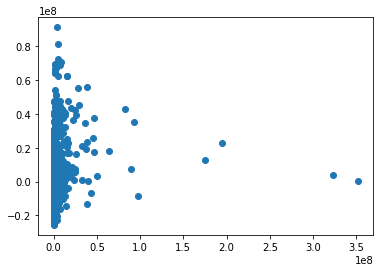

In [23]:
from sklearn.metrics import r2_score
plt.scatter(y_test, y_test_lr2)
r2 = r2_score(y_test, y_test_lr2)
print(r2)

0.4991901965412876


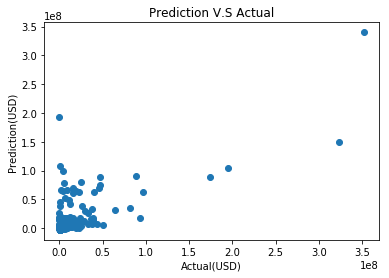

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
plt.scatter(y_test, y_test_lr)
plt.xlabel("Actual(USD)")
plt.ylabel("Prediction(USD)")
plt.title("Prediction V.S Actual")
r2 = r2_score(y_test, y_test_lr)
print(r2)

In [25]:
lrinter = LinearRegression(fit_intercept=False)
lrinter.fit(X_train, y_train)
y_test_lrinter =lrinter.predict(X_test)
r2_score(y_test, y_test_lrinter)

0.49920879871650714

In [42]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=2)
dtr.fit(X_train, y_train)
y_test_dtr =dtr.predict(X_test)
r2_score(y_test, y_test_dtr)

-5.090735035865891

In [26]:
# svm
from sklearn import svm
vm=svm.SVR(kernel='linear')
vm.fit(X_train, y_train)
y_test_vm =vm.predict(X_test)
r2_score(y_test, y_test_vm)

-0.0210325156442579

In [ ]:
vm=svm.SVR(kernel='poly')
vm.fit(X_train, y_train)
y_test_vm =vm.predict(X_test)
r2_score(y_test, y_test_vm)

In [ ]:
vm=svm.SVR(kernel='poly',degree=4,C=10)
vm.fit(X_train, y_train)
y_test_vm =vm.predict(X_test)
r2_score(y_test, y_test_vm)

In [ ]:
for x,y in zip(y_test, y_test_lr):
    print('Target={}\tPrediction={}'.format(x, y))

In [ ]:
lr.coef_

In [ ]:
data.columns[1:]

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_test_lr)

In [99]:
mean_squared_error(y_test, y_test_rf)

259341040651875.88